### Data Cleaning File (`data_cleaning.py`):
- **Handling Missing Values:**
  - Identify columns with missing values and their counts.
  - Impute missing values for numerical columns using the median strategy.
  - Impute missing values for categorical columns using the most frequent value strategy.
  - Ensure no missing values remain after imputation.

- **Removing Outliers:**
  - Remove outliers based on GrLivArea to ensure the dataset is not skewed by extreme values.
  - Specifically, rows where GrLivArea is greater than 4000 square feet are dropped.

### Data Preprocessing File (`data_preprocessing.py`):
- **Encoding Categorical Variables:**
  - Convert categorical variables into dummy/indicator variables using one-hot encoding.

- **Standardizing Numerical Features:**
  - Standardize all numerical features except 'SalePrice' using StandardScaler.
  - Scale 'SalePrice' separately to facilitate easier inversion of the scaling during final reporting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the cleaning and preprocessing functions
import data_cleaning as dc
import data_preprocessing as dp

# Load and clean the data
file_path = 'data/AmesData.csv'
ames_df_cleaned = dc.load_and_clean_data(file_path)

# Preprocess the cleaned data
ames_df_preprocessed, saleprice_scaler = dp.preprocess_data(ames_df_cleaned)

# Use the preprocessed DataFrame for plotting
ames_df = ames_df_preprocessed


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values after imputation and their counts:
Series([], dtype: int64)

The dataset contains 2769 rows and 80 columns before outlier removal.
Number of rows removed based on 'GrLivArea' > 4000: 5

The dataset contains 2764 rows and 80 columns after outlier removal.
Categorical variables encoded.
Numerical features standardized.
'SalePrice' standardized.


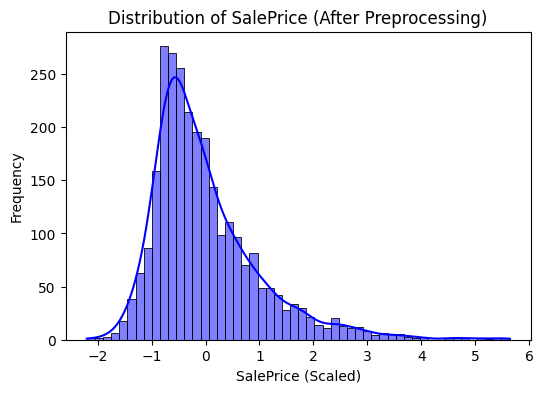

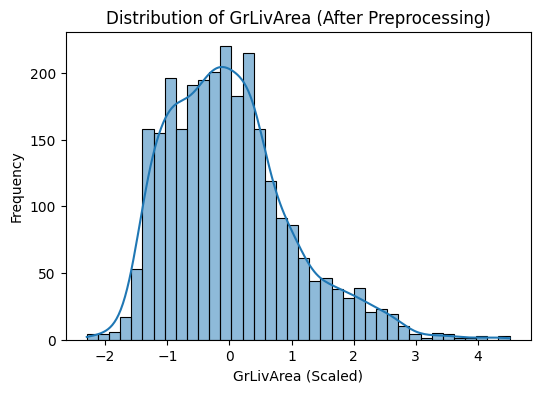

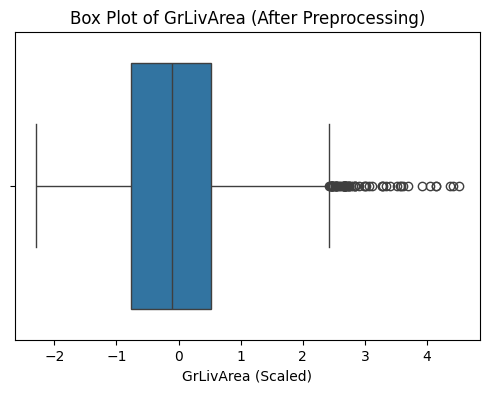

In [2]:
# Plot the distribution of 'SalePrice' after preprocessing
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice (After Preprocessing)')
plt.xlabel('SalePrice (Scaled)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'GrLivArea' after preprocessing
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea (After Preprocessing)')
plt.xlabel('GrLivArea (Scaled)')
plt.ylabel('Frequency')
plt.show()

# Visualize 'GrLivArea' with outliers highlighted after preprocessing
plt.figure(figsize=(6, 4))
sns.boxplot(x=ames_df['GrLivArea'])
plt.title('Box Plot of GrLivArea (After Preprocessing)')
plt.xlabel('GrLivArea (Scaled)')
plt.show()

In [3]:
num_rows, num_columns = ames_df.shape

print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 2764 rows and 256 columns.


### Data Preparation Summary:

- Loading the dataset from the CSV file again.
- Specifically replacing MasVnrArea to replace 'nan' with 0.
- Handling missing values: Using SimpleImputer to fill missing values with
    - the median for numerical columns and,
    - the most frequent value for categorical columns.
- Converting boolean columns to integers
- Checking the number of rows and columns before and after removing outliers based on GrLivArea.
- Removing outliers: Dropping rows where GrLivArea is greater than 4000.
- One-hot encoding categorical variables: Converting categorical variables into a format suitable for machine learning algorithms.
- Standardizing numerical features: Applying StandardScaler to standardize numerical features.
- Checking the number of rows and columns after each major step to make sure the transformations are applied correctly.
